In [2]:
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.optimize as opt;

 the "*.txt" file contains the "mass(#1)" and "Radius(#2)" of all the stars in the ZAMS for Fe/H=-1

In [4]:
data = np.loadtxt("M-R-z014.txt")
#data2 = np.loadtxt("Mlow-R-z014.txt")
#data3 = np.loadtxt("Mup-L-z014.txt")
data=np.transpose(data)
print(np.shape(data))
data.sort(axis=1)
#data2=np.transpose(data2)
#data3=np.transpose(data3)
#print(np.shape(data2))
#print(np.shape(data3))

(2, 196)


I changed the LogR in MIST data to the "R(R_sun)" 

In [5]:
Mdata = data[0]
Rdata = data[1]
print(Mdata)
print(Rdata)

[9.99997339e-02 1.49999638e-01 1.99999525e-01 2.49999416e-01
 2.99999330e-01 3.09999299e-01 3.19999343e-01 3.29999333e-01
 3.39999308e-01 3.49999291e-01 3.59999270e-01 3.69999245e-01
 3.79999220e-01 3.89999192e-01 3.99999172e-01 4.49999030e-01
 4.99998887e-01 5.49998760e-01 5.99998629e-01 6.49998488e-01
 6.99998341e-01 7.49998181e-01 7.99998002e-01 8.49997786e-01
 8.99997569e-01 9.19997454e-01 9.39997406e-01 9.59997313e-01
 9.79997207e-01 9.99997105e-01 1.01999705e+00 1.03999696e+00
 1.05999688e+00 1.07999682e+00 1.09999668e+00 1.11999656e+00
 1.13999621e+00 1.15999614e+00 1.17999605e+00 1.19999592e+00
 1.21999578e+00 1.23999571e+00 1.25999565e+00 1.27999552e+00
 1.29999552e+00 1.31999545e+00 1.33999528e+00 1.35999519e+00
 1.37999515e+00 1.39999509e+00 1.41999497e+00 1.43999482e+00
 1.45999478e+00 1.47999469e+00 1.49999450e+00 1.51999445e+00
 1.53999432e+00 1.55999431e+00 1.57999414e+00 1.59999404e+00
 1.61999401e+00 1.63999387e+00 1.65999382e+00 1.67999375e+00
 1.69999354e+00 1.719993

In [6]:
#Mlowdata = data2[0] #### M <= 1.09 M_sun   (Eggleton et.al 1989)
#Llowdata = data2[1] 
#Mupdata = data3[0]  #### M >= 1.09 M_sun
#Lupdata = data3[1]
#print(Mlowdata)
#print(Llowdata)
#print(Mupdata)
#print(Lupdata)

Text(0.5, 1.0, 'Z=0.014')

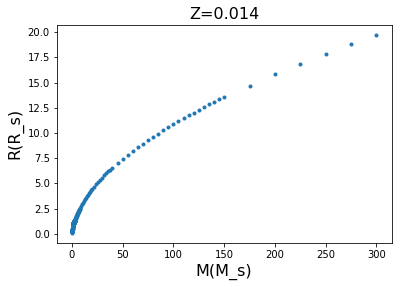

In [7]:
plt.plot(Mdata, Rdata, ".", label=data)
plt.xlabel('M(M_s)',fontsize=16)
plt.ylabel('R(R_s)',fontsize=16)
plt.title('Z=0.014',fontsize=16)


Text(0.5, 1.0, 'Z=0.014')

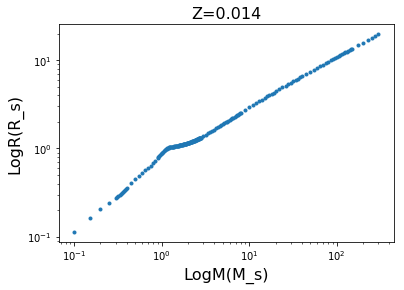

In [9]:
plt.loglog(Mdata,Rdata, ".")
plt.xlabel('LogM(M_s)',fontsize=16)
plt.ylabel('LogR(R_s)',fontsize=16)
plt.title('Z=0.014',fontsize=16)

In [29]:
def funcR(M, theta, iota, kappa, lambd, mu, nu, xi, omicron, pi ):
     return (theta*M**2.5 + iota*M**6.5 + kappa*M**11.0 + lambd*M**19.0 + mu*M**19.5 )/(nu + xi*M**2.0 + omicron*M**8.5 + M**18.5 + pi*M**19.5 )

Using the tout et.al(1996) form of function.


In [30]:
optimizedParameters,pcov = opt.curve_fit(funcR, Mdata, Rdata,maxfev=1000000000);
print(optimizedParameters);

[ 4.03899849e-06 -1.04320635e-04 -1.01929874e-02  7.85732229e-01
  4.48474583e-02  5.32381563e-08  6.86320813e-06 -4.73387061e-03
  1.30086740e-03]


Text(0, 0.5, 'R(R_s)')

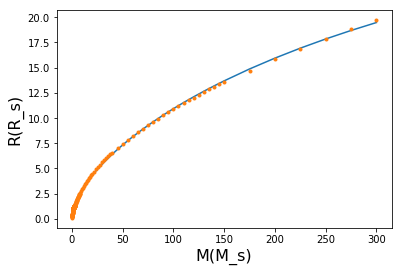

In [31]:
plt.plot(Mdata, funcR(Mdata, *optimizedParameters), label="fit");
plt.plot(Mdata, Rdata, ".", label="data")
plt.xlabel('M(M_s)',fontsize=16)
plt.ylabel('R(R_s)',fontsize=16)

the best fitted form of Tout's function to our data.  


[(-10, 10), (-2.5, 15)]

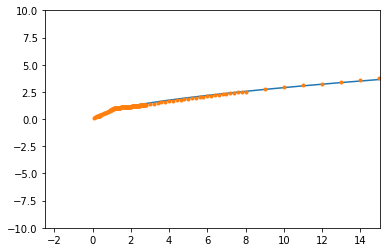

In [32]:
plt.plot(Mdata, funcR(Mdata, *optimizedParameters), label="fit");
plt.plot(Mdata, Rdata, ".", label="data")
plt.axes().set(xlim=(-2.5,15),ylim=(-10,10))

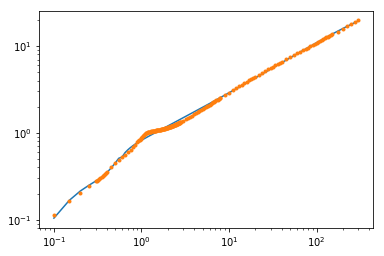

In [33]:
plt.loglog(Mdata, funcR(Mdata, *optimizedParameters), label="fit");
plt.loglog(Mdata, Rdata, ".", label="data")

I changed the form of function to a Quadratic  polynomial function.


In [34]:
def func2R(M, a, b, c, d, e):
     return (a*M**4 + b*M**3+c* M**2.0 + d*M + e )

In [35]:
optimizedParameters,pcov = opt.curve_fit(func2R, Mdata, Rdata,maxfev=100000);
print(optimizedParameters);

[-9.63154669e-09  6.52157201e-06 -1.56087610e-03  2.03383477e-01
  7.15433894e-01]


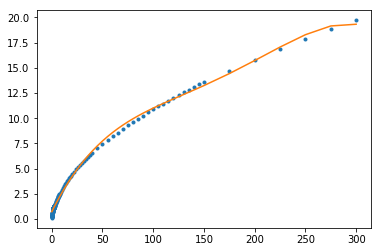

In [36]:
plt.plot(Mdata, Rdata, ".", label="Data")
plt.plot(Mdata, func2R(Mdata, *optimizedParameters), label="fit")

[(-10, 10), (-2.5, 10)]

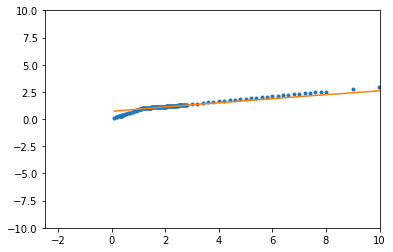

In [37]:
plt.plot(Mdata, Rdata, ".", label="Data")
plt.plot(Mdata, func2R(Mdata, *optimizedParameters), label="fit")
plt.axes().set(xlim=(-2.5,10),ylim=(-10,10))